<h1> Info Visualisation </h1>
<h2> Earthquakes in Romania </h2>
<h3> Ana-Maria Melinte, Andrei Dumitriu (507) </h3>

In [1]:
print("Hello, world!")
print("Starting project...")

Hello, world!
Starting project...


In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix

import seaborn as sns


# Convention for import of the pyplot interface
import matplotlib.pyplot as plt
# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

In [5]:
# Useful functions. Some are taken from previous projects that we wrote (PML / EDA)
def printDataDimensions(data):
  featuresNo, observationsNo = data.shape
  print("featuresNo: ", observationsNo)
  print("observationsNo: ", featuresNo)

In [6]:
print("Importing dataset...")
df = pd.read_csv("eartquakes_Romania.csv")
print("Done importing dataset.")
printDataDimensions(df)

Importing dataset...
Done importing dataset.
featuresNo:  22
observationsNo:  665


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             665 non-null    object 
 1   latitude         665 non-null    float64
 2   longitude        665 non-null    float64
 3   depth            665 non-null    float64
 4   mag              665 non-null    float64
 5   magType          665 non-null    object 
 6   nst              395 non-null    float64
 7   gap              415 non-null    float64
 8   dmin             45 non-null     float64
 9   rms              334 non-null    float64
 10  net              665 non-null    object 
 11  id               665 non-null    object 
 12  updated          665 non-null    object 
 13  place            665 non-null    object 
 14  type             665 non-null    object 
 15  horizontalError  35 non-null     float64
 16  depthError       218 non-null    float64
 17  magError        

In [ ]:
df.head()

In [8]:
# See how many values are null before engineering
data_missing = df.isnull().sum()
print(data_missing)

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                270
gap                250
dmin               620
rms                331
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError    630
depthError         447
magError           617
magNst             403
status               0
locationSource       0
magSource            0
dtype: int64


<AxesSubplot:>

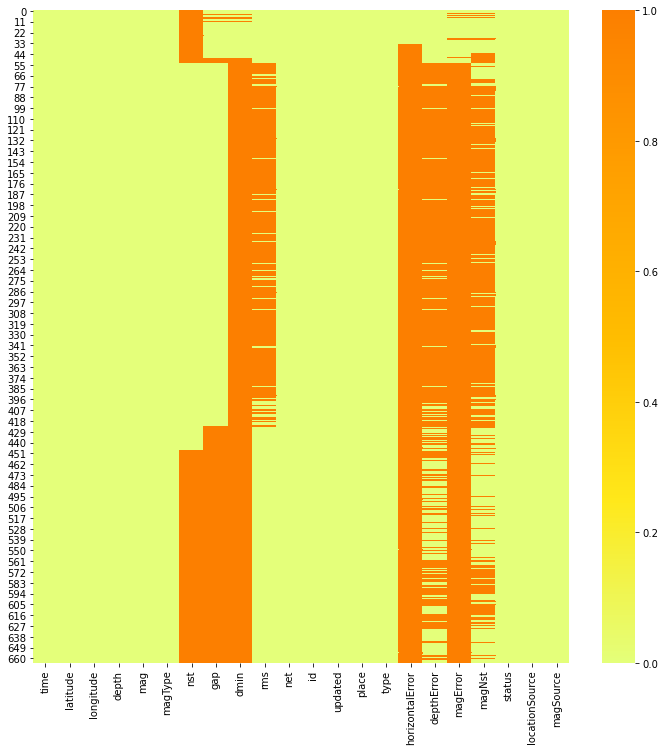

In [9]:
# Visualize how many values are null before engineering
plt.figure(figsize=(12, 12))
sns.heatmap(df.isnull(), cbar=True, cmap='Wistia')

In [5]:
# Since we loaded the model with object as dtype (for faster loading), 
# we're going to specify all the types manually
df['dateTime'] = pd.to_datetime(df['time'])

In [6]:
# split datetime into year, month, day, hour, minute, second and millisecond. Nanosecond was not recorder.
df['year'] = df['dateTime'].dt.year
df['month'] = df['dateTime'].dt.month
df['day'] = df['dateTime'].dt.day
df['hour'] = df['dateTime'].dt.hour
df['minute'] = df['dateTime'].dt.minute
df['second'] = df['dateTime'].dt.second
df['microsecond'] = df['dateTime'].dt.microsecond

In [7]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,locationSource,magSource,dateTime,year,month,day,hour,minute,second,microsecond
0,2017-03-08T13:43:13.070Z,45.6583,26.4629,148.97,4.1,mb,NaN,41.0,0.259,0.76,...,us,us,2017-03-08 13:43:13.070000+00:00,2017,3,8,13,43,13,70000
1,2017-02-08T15:08:20.550Z,45.5187,26.2594,127.01,4.7,mb,NaN,19.0,0.222,1.10,...,us,us,2017-02-08 15:08:20.550000+00:00,2017,2,8,15,8,20,550000
2,2017-02-08T09:52:06.090Z,45.7360,26.6616,129.27,4.4,mb,NaN,48.0,0.559,1.23,...,us,us,2017-02-08 09:52:06.090000+00:00,2017,2,8,9,52,6,90000
3,2016-12-27T23:20:56.100Z,45.7144,26.5283,97.00,5.6,mww,NaN,14.0,0.466,0.80,...,us,us,2016-12-27 23:20:56.100000+00:00,2016,12,27,23,20,56,100000
4,2016-10-31T11:59:49.800Z,45.8700,26.7800,90.00,4.1,mb,NaN,NaN,NaN,1.43,...,buc,us,2016-10-31 11:59:49.800000+00:00,2016,10,31,11,59,49,800000


In [8]:
# Remove duplicate rows
duplicate_rows_df = df[df.duplicated()]
df = df.drop_duplicates()

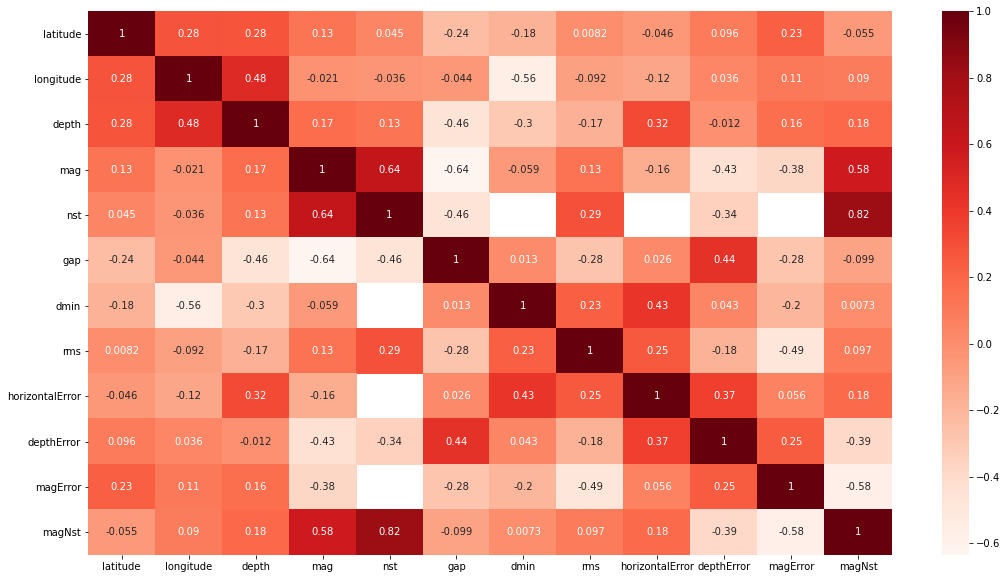

In [10]:
# Using Pearson correlation
plt.figure(figsize=(18, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

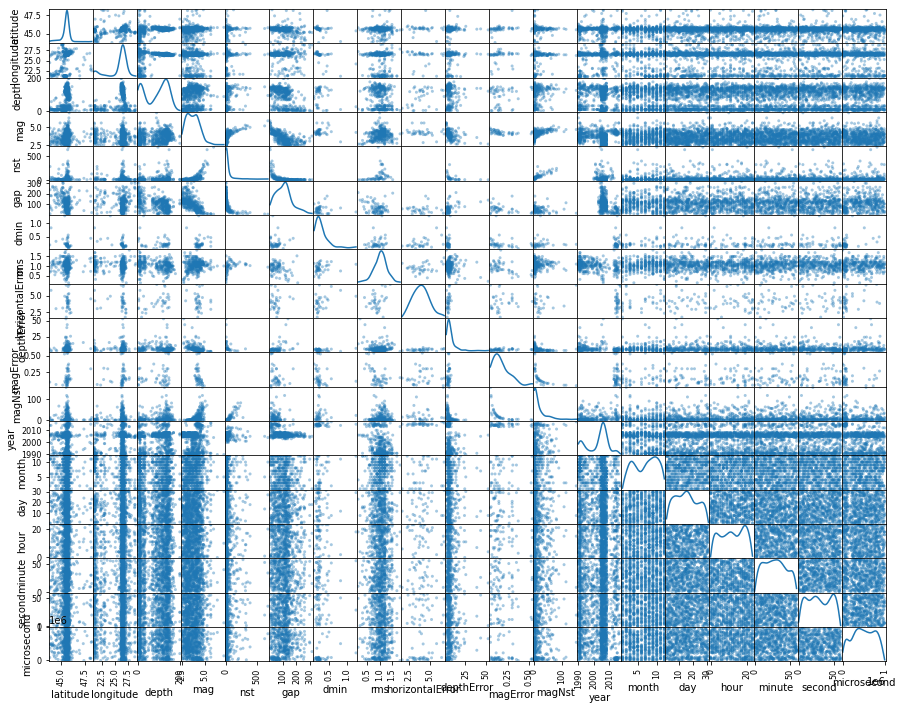

In [9]:
# # Plotting 
scatter_matrix(df, alpha=0.4, figsize=(15,12), diagonal='kde');

# Spotting trends

In [10]:
# We want to see if we can spot a trend 
# for the depth and magnitude 
# between 1970 - 2017

In [11]:
# for the plot we calculate 
# the mean for each year

grouped_df = df.groupby("year")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
mean_df.head()

,year,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,month,day,hour,minute,second,microsecond
0,1990,45.628318,26.232773,89.309091,3.936364,NaN,NaN,NaN,1.077273,NaN,8.487500,NaN,7.052632,6.772727,17.727273,8.500000,32.500000,25.227273,454090.909091
1,1991,45.385506,22.937185,43.664198,3.745679,NaN,NaN,NaN,1.106173,NaN,7.834375,NaN,7.575758,8.283951,15.111111,10.987654,27.790123,29.172840,510246.913580
2,1992,45.636526,25.895211,103.152632,4.200000,NaN,NaN,NaN,1.126316,NaN,5.993333,NaN,27.062500,7.631579,13.631579,13.157895,24.000000,32.947368,550526.315789
3,1993,45.450353,26.079471,98.329412,3.811765,NaN,NaN,NaN,1.017647,NaN,6.385714,NaN,16.533333,6.352941,16.588235,11.000000,22.529412,29.352941,588235.294118
4,1994,45.551444,25.028111,94.311111,3.761111,NaN,NaN,NaN,1.055556,NaN,7.738462,NaN,7.200000,7.611111,14.222222,13.111111,30.388889,27.666667,475000.000000


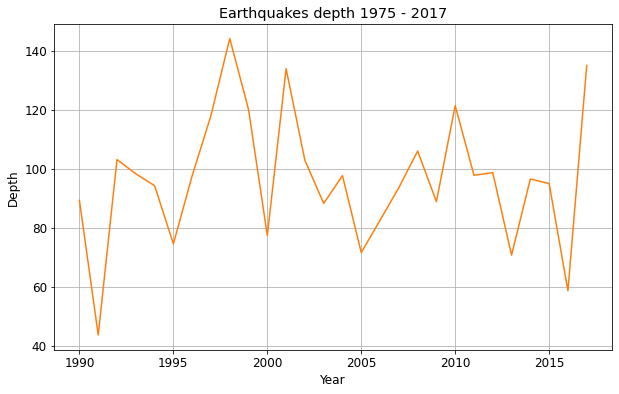

In [12]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(mean_df.year, mean_df.depth, color='tab:orange', label='depth')

# Same as above
ax.set_xlabel('Year')
ax.set_ylabel('Depth')
ax.set_title('Earthquakes depth 1975 - 2017')
ax.grid(True)

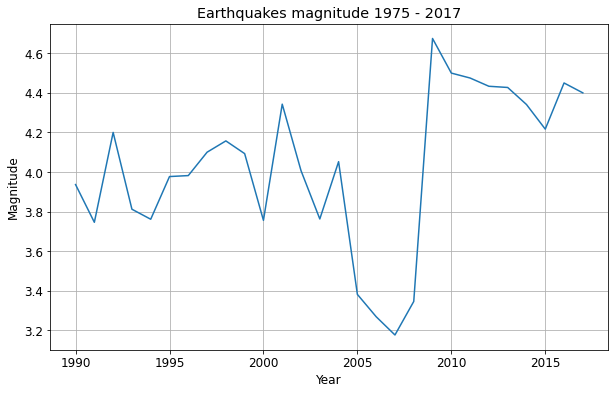

In [13]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(mean_df.year, mean_df.mag, color='tab:blue', label='magnitude')

# Same as above
ax.set_xlabel('Year')
ax.set_ylabel('Magnitude')
ax.set_title('Earthquakes magnitude 1975 - 2017')
ax.grid(True)

# Finding correlations

Depth and magnitude correlation:  0.16901812241572492


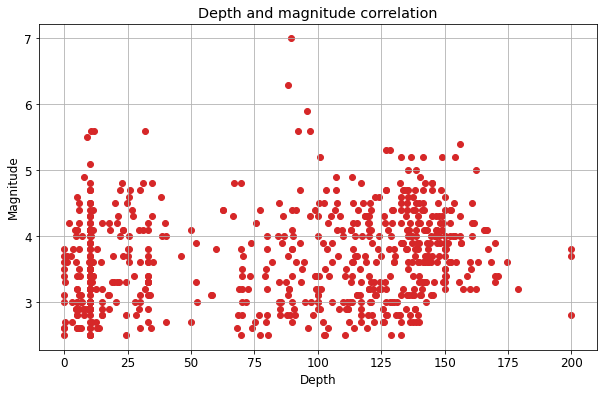

In [14]:
# We want to see if we can spot a correlation 
# between depth and magnitude

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.scatter(df.depth, df.mag, color='tab:red')

# Same as above
ax.set_xlabel('Depth')
ax.set_ylabel('Magnitude')
ax.set_title('Depth and magnitude correlation')
ax.grid(True)

correlation = df["depth"].corr(df["mag"])
print("Depth and magnitude correlation: ", correlation)

Depth and latitude correlation:  0.2772062930152593


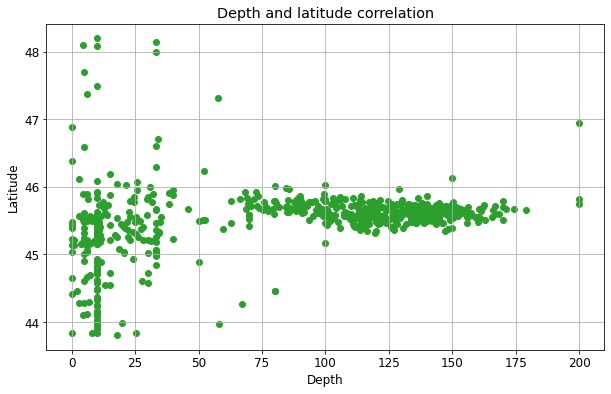

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.scatter(df.depth, df.latitude, color='tab:green')

# Same as above
ax.set_xlabel('Depth')
ax.set_ylabel('Latitude')
ax.set_title('Depth and latitude correlation')
ax.grid(True)

correlation = df["depth"].corr(df["latitude"])
print("Depth and latitude correlation: ", correlation)

Magnitude and latitude correlation:  0.13042753682508032


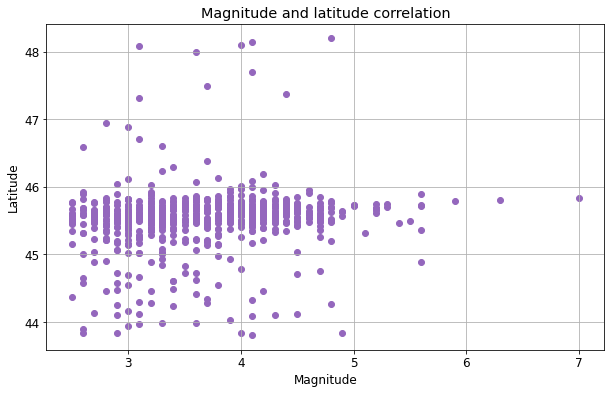

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.scatter(df.mag, df.latitude, color='tab:purple')

# Same as above
ax.set_xlabel('Magnitude')
ax.set_ylabel('Latitude')
ax.set_title('Magnitude and latitude correlation')
ax.grid(True)

correlation = df["latitude"].corr(df["mag"])
print("Magnitude and latitude correlation: ", correlation)